## Load Data

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Projects/Pakkanodi Assignments/TV News channel dataset")
 
input_folder = "data/"
output_folder = "processed_data/"

channels = ["BBC", "CNN", "TIMESNOW", "CNNIBN", "NDTV"]
channel = channels[0]

import pandas as pd
import numpy as np

df = pd.read_csv(r""+output_folder+channel+"/"+channel+'.csv')

# ELM custom implementation

In [ ]:
# # https://towardsdatascience.com/build-an-extreme-learning-machine-in-python-91d1e8958599
# # https://elm.readthedocs.io/en/latest/usage.html


# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import MinMaxScaler
# from scipy.linalg import pinv

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split

# X, y = df.iloc[:,2:].to_numpy(), df.target.to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)


# onehotencoder = OneHotEncoder(categories='auto')
# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# y_train = onehotencoder.fit_transform(y_train.reshape(-1, 1))
# X_test = scaler.fit_transform(X_test)
# y_test = onehotencoder.fit_transform(y_test.reshape(-1, 1))
# X_val = scaler.fit_transform(X_val)
# y_val = onehotencoder.fit_transform(y_val.reshape(-1, 1))

# print(X_train.shape, X_test.shape, X_val.shape)
# print(y_train.shape, y_test.shape, y_val.shape)


In [ ]:
# input_size = X_train.shape[1]
# hidden_size = 1000

# input_weights = np.random.normal(size=[input_size,hidden_size])
# biases = np.random.normal(size=[hidden_size])

In [ ]:
# def relu(x):
#    return np.maximum(x, 0, x)

# def hidden_nodes(X):
#     G = np.dot(X, input_weights)
#     G = G + biases
#     H = relu(G)
#     return H

# def predict(X):
#     out = hidden_nodes(X)
#     out = np.dot(out, output_weights)
#     return out


In [ ]:
# output_weights = np.dot(pinv(hidden_nodes(X_train)), y_train)

In [ ]:
# prediction = predict(X_val)
# correct = 0
# total = X_val.shape[0]

# for i in range(total):
#     predicted = np.argmax(prediction[i])
#     actual = np.argmax(y_val[i])
#     correct += 1 if predicted == actual else 0

# accuracy = correct/total
# print('Accuracy for ', hidden_size, ' hidden nodes: ', accuracy)

## SVM - linear kernel

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,2:].to_numpy(), df.target.to_numpy()

svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(X, y, test_size=0.20, random_state=42)
svm_X_train, svm_X_val, svm_y_train, svm_y_val = train_test_split(svm_X_train, svm_y_train, test_size=0.20, random_state=42)

print(svm_X_train.shape, svm_X_test.shape, svm_X_val.shape)
print(svm_y_train.shape, svm_y_test.shape, svm_y_val.shape)

(11340, 230) (3544, 230) (2836, 230)
(11340,) (3544,) (2836,)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='linear',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

svm_model.fit(svm_X_train, svm_y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear', random_state=0))])

In [ ]:
print("Accuracy : {:.2f}%".format(svm_model.score(svm_X_val, svm_y_val)*100))

Accuracy : 86.14%


In [ ]:
confusion_matrix(svm_y_val, svm_model.predict(svm_X_val))

array([[1371,  119],
       [ 274, 1072]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


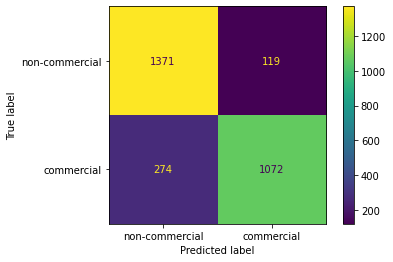

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_model, svm_X_val, svm_y_val, display_labels=['non-commercial','commercial'])

In [ ]:
print(classification_report(svm_y_val, svm_model.predict(svm_X_val)))

              precision    recall  f1-score   support

          -1       0.83      0.92      0.87      1490
           1       0.90      0.80      0.85      1346

    accuracy                           0.86      2836
   macro avg       0.87      0.86      0.86      2836
weighted avg       0.87      0.86      0.86      2836



## DeepLearning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,2:].to_numpy(), df.target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

y_train[y_train==-1] = 0
y_test[y_test==-1] = 0
y_val[y_val==-1] = 0


print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(11340, 230) (3544, 230) (2836, 230)
(11340,) (3544,) (2836,)


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# onehotencoder = OneHotEncoder(categories='auto')

# y_train = onehotencoder.fit_transform(y_train.reshape(-1, 1))
# y_test = onehotencoder.fit_transform(y_test.reshape(-1, 1))
# y_val = onehotencoder.fit_transform(y_val.reshape(-1, 1))

# print(X_train.shape, X_test.shape, X_val.shape)
# print(y_train.shape, y_test.shape, y_val.shape)

In [ ]:
# build a model
model1 = Sequential()
model1.add(Dense(230, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model1.add(Dense(50, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary() 

# compile the model
model1.compile(optimizer='Adadelta', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model1.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=40, # you can set this to a big number!
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    # validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 230)               53130     
                                                                 
 dense_13 (Dense)            (None, 50)                11550     
                                                                 
 dense_14 (Dense)            (None, 16)                816       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65,513
Trainable params: 65,513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
89/89 [==============================] - 1s 7ms/step - loss: 162.9702 - accuracy: 0.5578 - val_loss: 157.0371 - val_accuracy: 0.5515
Epoch 2/40
89/89 [====================

In [ ]:
# build a model
model2 = Sequential()
model2.add(Dense(230, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model2.add(Dense(50, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary() 

# compile the model
model2.compile(optimizer='Adagrad', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model2.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=40, # you can set this to a big number!
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    # validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 230)               53130     
                                                                 
 dense_17 (Dense)            (None, 50)                11550     
                                                                 
 dense_18 (Dense)            (None, 16)                816       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65,513
Trainable params: 65,513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
89/89 [==============================] - 1s 7ms/step - loss: 7.1651 - accuracy: 0.6638 - val_loss: 3.3545 - val_accuracy: 0.7031
Epoch 2/40
89/89 [========================

In [ ]:
# build a model
model3 = Sequential()
model3.add(Dense(230, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model3.add(Dense(50, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary() 

# compile the model
model3.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model3.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=40, # you can set this to a big number!
                    batch_size=128,
                    validation_data=(X_val, y_val),
                    # validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 230)               53130     
                                                                 
 dense_21 (Dense)            (None, 50)                11550     
                                                                 
 dense_22 (Dense)            (None, 16)                816       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 65,513
Trainable params: 65,513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
89/89 [==============================] - 1s 8ms/step - loss: 5.3792 - accuracy: 0.7014 - val_loss: 1.1381 - val_accuracy: 0.7535
Epoch 2/40
89/89 [========================

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


preds = np.round(model1.predict(X_val),0)

print(confusion_matrix(y_val, preds))

print(classification_report(y_val, preds))

89/89 [==============================] - 0s 2ms/step
[[1061  429]
 [ 538  808]]
              precision    recall  f1-score   support

           0       0.66      0.71      0.69      1490
           1       0.65      0.60      0.63      1346

    accuracy                           0.66      2836
   macro avg       0.66      0.66      0.66      2836
weighted avg       0.66      0.66      0.66      2836



## Results comparison using Validation data

89/89 [==============================] - 0s 2ms/step


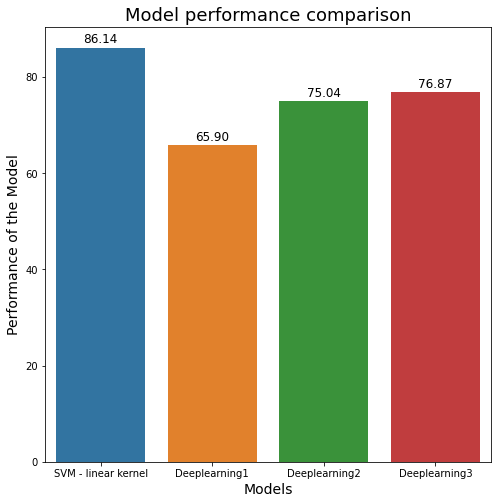

In [ ]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating our own dataframe
accuracy_results = {"Model Names" : ['SVM - linear kernel', 'Deeplearning1', 'Deeplearning2', 'Deeplearning3'],
        "Accuracy": [svm_model.score(svm_X_val, svm_y_val)*100, 
                     accuracy_score(np.round(model1.predict(X_val),0), y_val)*100, 
                     accuracy_score(np.round(model2.predict(X_val),0), y_val)*100,  
                     accuracy_score(np.round(model3.predict(X_val),0), y_val)*100, ]}
# Now convert this dictionary type data into a pandas dataframe
# specifying what are the column names
accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Model performance comparison", Size=18)
plt.xlabel("Models", size=14)
plt.ylabel("Performance of the Model", size=14)

# Finally showing the plot
plt.show()

89/89 [==============================] - 0s 2ms/step


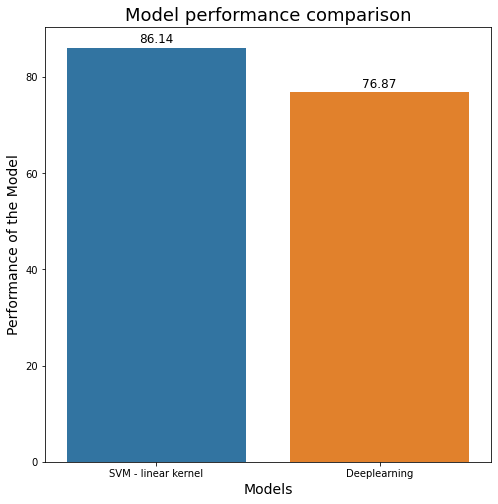

In [ ]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating our own dataframe
accuracy_results = {"Model Names" : ['SVM - linear kernel', 'Deeplearning'],
        "Accuracy": [svm_model.score(svm_X_val, svm_y_val)*100, 
                     accuracy_score(np.round(model3.predict(X_val),0), y_val)*100, ]}
# Now convert this dictionary type data into a pandas dataframe
# specifying what are the column names
accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
# Iterrating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Model performance comparison", Size=18)
plt.xlabel("Models", size=14)
plt.ylabel("Performance of the Model", size=14)

# Finally showing the plot
plt.show()

# Test results on best model

Accuracy : 85.92 % 



              precision    recall  f1-score   support

          -1       0.83      0.92      0.87      1876
           1       0.90      0.79      0.84      1668

    accuracy                           0.86      3544
   macro avg       0.87      0.86      0.86      3544
weighted avg       0.86      0.86      0.86      3544



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


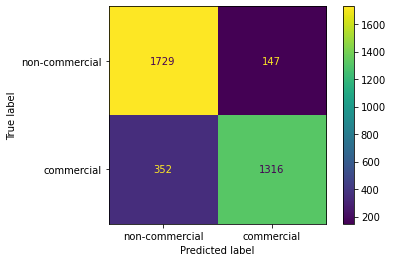

In [ ]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

best_model_predictions = svm_model.predict(svm_X_test)

print("Accuracy : {:.2f} % \n\n\n".format(svm_model.score(svm_X_test, svm_y_test)*100))

print(classification_report(svm_y_test, best_model_predictions))

plot_confusion_matrix(svm_model, svm_X_test, svm_y_test, display_labels=['non-commercial','commercial'])